In [1]:
import numpy as np
import pandas as pd

import datetime

notebook_start_time = datetime.datetime.now()
print(f"Notebook last run (end-to-end): {notebook_start_time}")

Notebook last run (end-to-end): 2025-02-05 00:15:38.929785


In [2]:
df = pd.read_csv("../data/high_diamond_ranked_10min.csv")
# From exploratory data analysis notebook
drop_columns = ['gameId', 'blueEliteMonsters', 'redEliteMonsters', 'redGoldDiff', 'redExperienceDiff', 'blueGoldPerMin', 'redGoldPerMin', 'redFirstBlood', 'redDeaths', 'blueDeaths']
df = df.drop(columns=drop_columns)
df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin
0,0,28,2,1,9,11,0,0,0,17210,...,8,0,0,0,16567,6.8,17047,197,55,19.7
1,0,12,1,0,5,5,0,0,0,14712,...,2,1,1,1,17620,6.8,17438,240,52,24.0
2,0,15,0,0,7,4,1,0,0,16113,...,14,0,0,0,17285,6.8,17254,203,28,20.3
3,0,43,1,0,4,5,0,1,0,15157,...,10,0,0,0,16478,7.0,17961,235,47,23.5
4,0,75,4,0,6,6,0,0,0,16400,...,7,1,0,0,17404,7.0,18313,225,67,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,5,1,0,0,17765,...,7,0,0,0,15246,6.8,16498,229,34,22.9
9875,1,54,0,0,6,8,1,0,0,16238,...,3,0,0,0,15456,7.0,18367,206,56,20.6
9876,0,23,1,0,6,5,0,0,0,15903,...,11,1,0,0,18319,7.4,19909,261,60,26.1
9877,0,14,4,1,2,3,1,0,0,14459,...,1,0,0,0,15298,7.2,18314,247,40,24.7


## Train-Test Split

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['blueWins']
X = df.drop(columns=['blueWins'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_train_scaler.transform(X_train)

In [4]:
# perform principal component analysis
from sklearn.decomposition import PCA

# find the number of components that explain 95% of the variance
pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

X_test_scaled = X_train_scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of components: {pca.n_components_}")

Number of components: 17


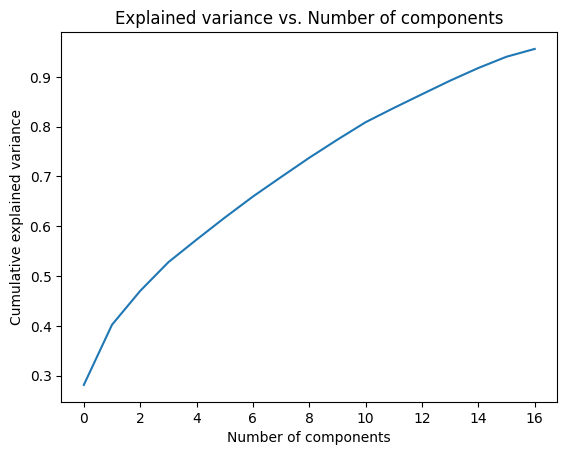

In [5]:
# analyze the explained variance
from matplotlib import pyplot as plt
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance vs. Number of components')
plt.show()

In [6]:
# analyze what each component represents
components = pd.DataFrame(pca.components_, columns=X.columns)
components.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,...,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin
0,0.009204,0.032070,0.129672,0.222426,0.183739,0.101260,0.063520,0.098187,0.278621,0.247566,...,-0.174540,-0.103979,-0.066943,-0.092289,-0.273463,-0.247395,-0.265715,-0.171978,-0.072816,-0.171978
1,-0.005808,0.046675,-0.008965,-0.292344,-0.269137,0.006161,0.010783,-0.077018,-0.163607,0.157230,...,-0.282715,0.048339,0.013615,-0.062012,-0.170750,0.145607,0.164242,0.322430,0.195881,0.322430
2,0.032279,0.034735,-0.006691,0.277343,0.236480,-0.037398,0.055394,0.066835,0.327179,0.314816,...,0.241105,0.071539,0.029502,0.039317,0.331425,0.317538,0.315333,0.111297,0.143926,0.111297
3,-0.070447,-0.034800,-0.094516,-0.094569,-0.152285,-0.561916,0.122572,0.138136,-0.014973,-0.016553,...,0.106208,0.562185,-0.080360,-0.105560,-0.037589,-0.040239,-0.048927,-0.257186,0.152043,-0.257186
4,-0.121617,-0.101788,0.175005,0.100035,0.153350,-0.062663,-0.454980,-0.096747,0.052189,-0.029081,...,-0.195531,0.061759,0.517977,0.256617,-0.038252,0.047529,0.057706,-0.063794,0.343637,-0.063794


In [7]:
for i in range(pca.n_components_):
    print(f"Component {i}")
    print(components.iloc[i].sort_values(ascending=False))
    print()

Component 0
blueGoldDiff                    0.340650
blueExperienceDiff              0.332441
blueTotalGold                   0.278621
blueTotalExperience             0.266415
blueAvgLevel                    0.247566
blueKills                       0.222426
blueAssists                     0.183739
blueTotalMinionsKilled          0.171536
blueCSPerMin                    0.171536
blueFirstBlood                  0.129672
blueDragons                     0.101260
blueTowersDestroyed             0.098187
blueTotalJungleMinionsKilled    0.074185
blueHeralds                     0.063520
blueWardsDestroyed              0.032070
blueWardsPlaced                 0.009204
redWardsPlaced                 -0.006875
redWardsDestroyed              -0.038961
redHeralds                     -0.066943
redTotalJungleMinionsKilled    -0.072816
redTowersDestroyed             -0.092289
redDragons                     -0.103979
redCSPerMin                    -0.171978
redTotalMinionsKilled          -0.171978
redA

## Interpretations of Principal Components

**Component 0** seems to be relative resources (gold diff and experience diff) and absolute resources (blue total gold, blue gold per min, blue total experience, and blue average level) with some smaller coefficients for other stats. Notably it has low correlation with dragons, heralds, jungle monsters, etc, and a moderate negative correlation with red team assists, kills, average level, total experience, gold per min, and total gold. Seems to be a **rough proxy for team lead**.

**Component 1** cares about how many kills and assists were on both teams, but stats about how much absolute gold each team had. Coefficients drop off steeply, and seems to have moderate negative correlation with jungle stats and minions. Seems to very clearly be representing **how much kill gold each team has.**

**Component 2** measures total experience and average level, with some info on absolute gold and how many minions have been killed. Seems to care a tiny amount about assists and jungle minions. Since all correlations are positive, it **might be overall level and resources available to *both* teams.**

**Component 3** has the strongest absolute correlations seen so far with how many dragons the red team has taken (+0.56) and how many dragons the blue team has taken (-0.56); note that these are the same numbers with the sign flipped. Slight positive correlation with blue minion features and slight negative correlation with red minion features (with opposite signs from their team's dragon features). Seems to clearly represent **which team gets an early dragon**; reversed correlation with minions may indicate that **if teams are not taking minions, they may be angling for an early dragon.**

**Component 4** is clearly related to which team got the herald, and we see the same pattern as with component 3: redHerald (+0.465) and blueHerald (-4.13), with moderate affinity for red jungle minions killed. Slight affinity for how many towers the red team has destroyed and how many assists and kills the blue team has. Not sure about those low correlations, or why redWardsDestroyed has a moderate negative coefficient, but this seems to be **which team gets the herald**.

**Component 5** is weird because it cares about how many wards the blue team has destroyed, which exploratory data analysis has indicated matters very little. It also has blue cs per minute and blue total minions killed, and *red* team heralds, so this **may roughly indicate how well the blue bot lane is doing** (although we would expect maybe a stronger correlation with blue dragons than .155, but component 3 may be monopolizing that). Because it ranks blue wards destroyed so highly, this may be where we start getting diminishing returns.

**Component 6** is another one that cares about wards, this time both team's wards. Despite a strong negative affinity for blue total jungle minions and other features, this is likely **vision control**.

**Component 7** cares about how may red jungle minions are killed and whether blue got a first blood and early dragon, and is negatively correlated with how many towers the red team destroyed. This seems to correlate with **the red team's early jungle presence**.

**Component 8** screams about structures, with blue towers destroyed at .627 and red towers destroyed at .497, followed by blue heralds at .47 and red heralds at .20. Considering that heralds are used to destroy towers and that all other correlations are small, this is obviously **how many towers are destroyed by both teams**.

### Summary and Comments

There are some strong correlations in later principal components, but by this point we are unlikely to use more principal components especially when so many seem to care about vision and warding. I'm surprised that component 8 was so low, when our exploratory data analysis indicated that stomps mostly correlated with towers being destroyed. Components 0, 1, and 2 are unsurprising because they care about metrics most closely correlated with win rate.

## Models: Logistic Regression, LDA, KNN, SVC, Random Forest 

In [8]:
from dataclasses import dataclass, field
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

@dataclass
class ModelData:
    model: object
    accuracies: list = field(default_factory=lambda: [])
    max_accuracy: float = -float('inf')
    number_of_PCs: int = None

models = {
    "Logistic Regression": ModelData(LogisticRegression()),
    "LDA": ModelData(LinearDiscriminantAnalysis()),
    "KNN": ModelData(KNeighborsClassifier()),
    "SVM": ModelData(SVC()),
    "Random Forest": ModelData(RandomForestClassifier())
    # We want to tweak a hyperparameter for QDA, so we'll do that separately
}

for name, model_data in models.items():
    print(f"Now training {name} model...", end=" ")
    start_time = datetime.datetime.now()
    for i in range(1, pca.n_components_ + 1):
        model_data.model.fit(X_train_pca[:, :i+1], y_train)
        score = model_data.model.score(pca.transform(X_test_scaled)[:, :i+1], y_test)
        model_data.accuracies.append(score)
        if score > model_data.max_accuracy:
            model_data.max_accuracy = score
            model_data.number_of_PCs = i
    print(f"done ({datetime.datetime.now() - start_time}) and max accuracy of {model_data.max_accuracy:.3f} achieved with {model_data.number_of_PCs} PCs")

Now training Logistic Regression model... done (0:00:00.113109) and max accuracy of 0.734 achieved with 4 PCs
Now training LDA model... done (0:00:00.120997) and max accuracy of 0.737 achieved with 4 PCs
Now training KNN model... done (0:00:02.518496) and max accuracy of 0.702 achieved with 5 PCs
Now training SVM model... done (0:00:36.784766) and max accuracy of 0.729 achieved with 5 PCs
Now training Random Forest model... done (0:00:47.683104) and max accuracy of 0.726 achieved with 16 PCs


## Model: Quadratic Discriminant Analysis

In [9]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Changing regularization parameter helped improve the accuracy of the model before PCA, maybe it will after PCA as well
x = np.arange(1, pca.n_components_ + 1)
y = np.arange(0, 1, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.zeros((10, pca.n_components_))

QDA_max_accuracy = 0
QDA_max_accuracy_params = (0, 0)

for i in range(1, pca.n_components_ + 1):
    for j in range(0, 10):
        qda = QuadraticDiscriminantAnalysis(reg_param=j/10)
        qda.fit(X_train_pca[:, :i+1], y_train)
        qda_accuracy = accuracy_score(y_test, qda.predict(X_test_pca[:, :i+1]))
        Z[j, i - 1] = qda_accuracy
        if qda_accuracy > QDA_max_accuracy:
            QDA_max_accuracy = qda_accuracy
            QDA_max_accuracy_params = (i, j/10)

## Graphing Results, Choosing Number of Principal Components

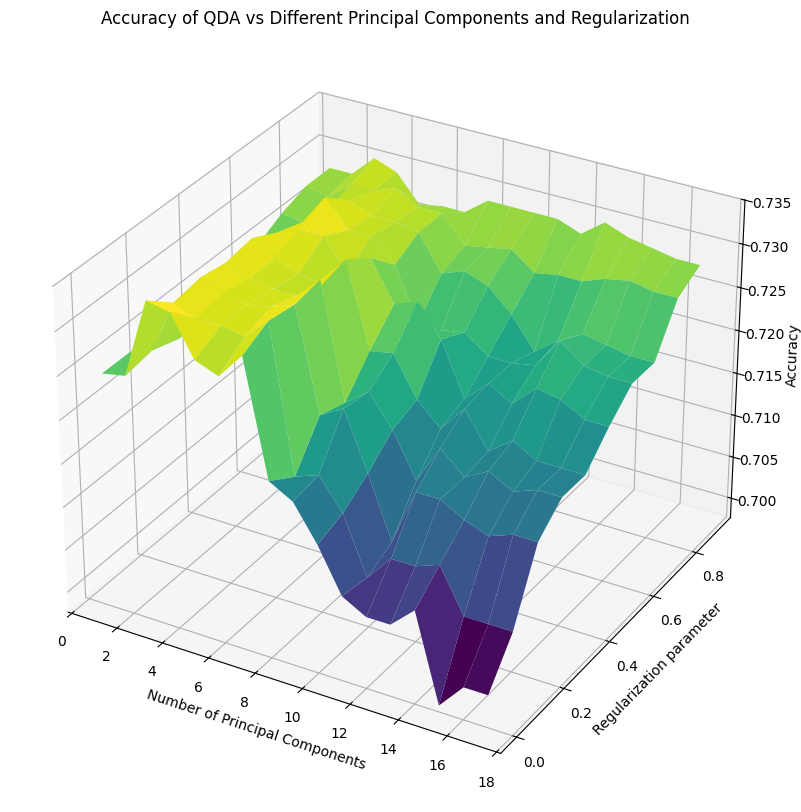

In [23]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(10, 10)

ax.set_title("Accuracy of QDA vs Different Principal Components and Regularization")
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Regularization parameter")
ax.set_zlabel("Accuracy")
# zorder isn't working for some reason
# ax.scatter(max_accuracy_params[0], max_accuracy_params[1], max_accuracy, 'b.', s=5000, color='r', zorder=2.5)
ax.plot_surface(X, Y, Z, cmap='viridis', zorder=1)
plt.show()

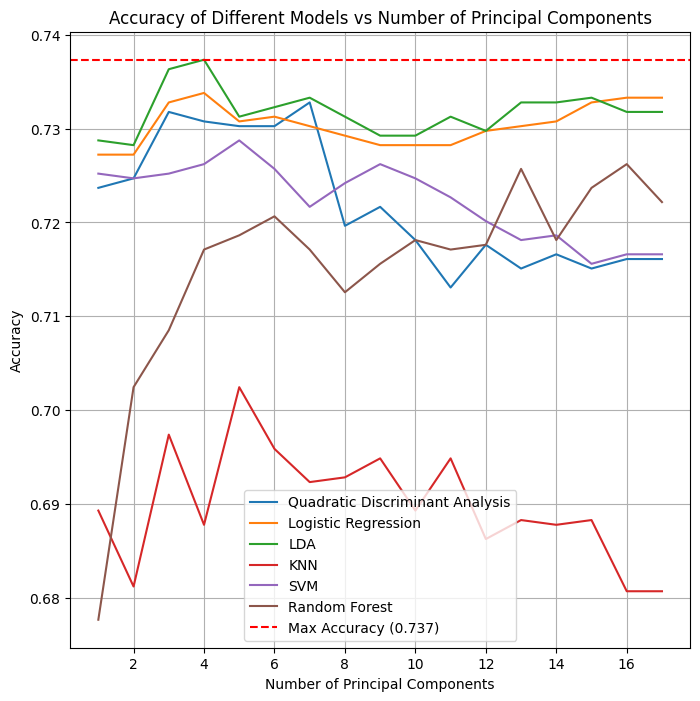

In [24]:
fig = plt.figure()
fig.set_size_inches(8, 8)

plt.plot(range(1, pca.n_components_+1), Z[QDA_max_accuracy_params[0]], label="Quadratic Discriminant Analysis")
for name, model_data in models.items():
    plt.plot(range(1, pca.n_components_+1), model_data.accuracies, label=name)
plt.grid()
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models vs Number of Principal Components")

# plot horizontal line for max accuracy
max_accuracy = max([model_data.max_accuracy for model_data in models.values()] + [QDA_max_accuracy])
plt.axhline(max_accuracy, color='r', linestyle='--', label=f"Max Accuracy ({max_accuracy:.3f})")
plt.legend()
plt.show()

The jury is in: **5 principal components** seem to be the most accurate, and linear & quadratic discriminant analysis and logistic regression seemed to **all cap out around 0.735 accuracy**. The support vector machine had the **greatest accuracy increase** between non-PCA and PCA training, but still performed slightly worse than the aforementioned models. Random forest had a notable spike at 9 PCs, but also performed worse than the top models and needed more PCs. K-nearest neighbors was outperformed by every other model for every number of PCs, so it is not competitive. This likely means that **parametric models** will easily outperform nonparametric models in this problem.

## Models: Neural Networks

In [12]:
# Neural network on 5 principal components
import tensorflow as tf

num_principal_components = 5

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

epochs = 100

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
history_1 = model_1.fit(X_train_pca[:, :num_principal_components+1], y_train, epochs=epochs, verbose=1)
loss, accuracy = model_1.evaluate(X_test_pca[:, :num_principal_components+1], y_test)
print(f"Loss of neural network: {loss:.3f}")
print(f"Accuracy of neural network: {accuracy:.3f}")

2025-02-05 00:17:08.505998: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-05 00:17:08.519313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738732628.534083  159867 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738732628.538261  159867 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 00:17:08.553048: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Epoch 1/100


2025-02-05 00:17:09.912170: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6663 - loss: 0.6150
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7272 - loss: 0.5458
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7346 - loss: 0.5334
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7280 - loss: 0.5343
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7225 - loss: 0.5463
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7297 - loss: 0.5332
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7260 - loss: 0.5300
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7230 - loss: 0.5319
Epoch 9/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7360 - loss: 0.5240
Epoch 10/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7281 - loss: 0.5307
Epoch 11/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7311 - loss: 0.5288
Epoch 12/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

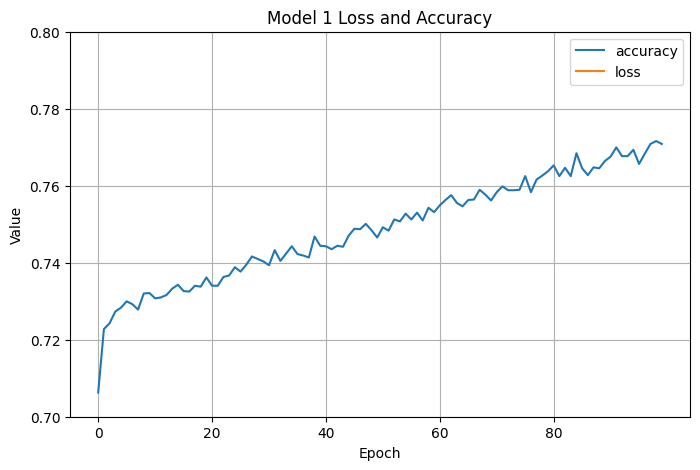

In [13]:
pd.DataFrame(history_1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.7, 0.8)
plt.title("Model 1 Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(np.arange(0, epochs, 20))
plt.show()

In [14]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# triple epochs
epochs = 300

# double learning rate
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history_2 = model_2.fit(X_train_pca[:, :num_principal_components+1], y_train, epochs=epochs, verbose=1)
loss, accuracy = model_2.evaluate(X_test_pca[:, :num_principal_components+1], y_test)
print(f"Loss of neural network: {loss:.3f}")
print(f"Accuracy of neural network: {accuracy:.3f}")

Epoch 1/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6543 - loss: 0.6179
Epoch 2/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7307 - loss: 0.5389
Epoch 3/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7243 - loss: 0.5395
Epoch 4/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7396 - loss: 0.5244
Epoch 5/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7298 - loss: 0.5320
Epoch 6/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7384 - loss: 0.5239
Epoch 7/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7355 - loss: 0.5238
Epoch 8/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7276 - loss: 0.5318
Epoch 9/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7390 - loss: 0.5155
Epoch 10/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7338 - loss: 0.5269
Epoch 11/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7351 - loss: 0.5243
Epoch 12/300
247/247 ━━━━━━━━━━━━━━━━━━━━

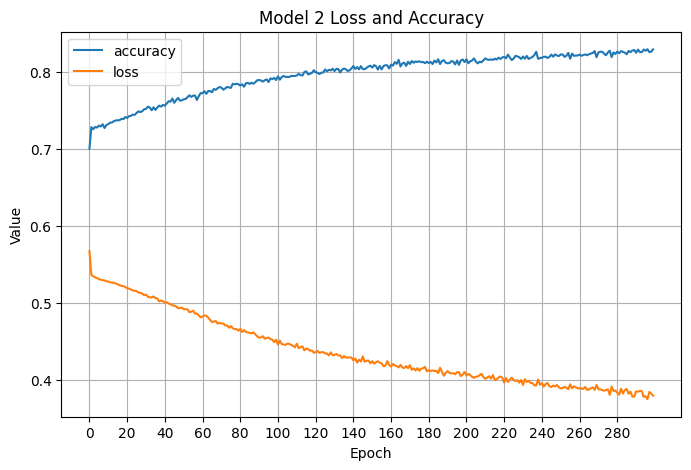

In [15]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model 2 Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(np.arange(0, epochs, 20))
plt.show()

In [16]:
# make the model deeper
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history_3 = model_3.fit(X_train_pca[:, :num_principal_components+1], y_train, epochs=epochs, verbose=1)
loss, accuracy = model_3.evaluate(X_test_pca[:, :num_principal_components+1], y_test)
print(f"Loss of neural network: {loss:.3f}")
print(f"Accuracy of neural network: {accuracy:.3f}")

Epoch 1/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6939 - loss: 0.5942
Epoch 2/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7387 - loss: 0.5346
Epoch 3/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7380 - loss: 0.5294
Epoch 4/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7278 - loss: 0.5339
Epoch 5/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7299 - loss: 0.5377
Epoch 6/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7295 - loss: 0.5371
Epoch 7/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7325 - loss: 0.5318
Epoch 8/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7253 - loss: 0.5350
Epoch 9/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7291 - loss: 0.5344
Epoch 10/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7268 - loss: 0.5351
Epoch 11/300
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7352 - loss: 0.5279
Epoch 12/300
247/247 ━━━━━━━━━━━━━━━━━━━━

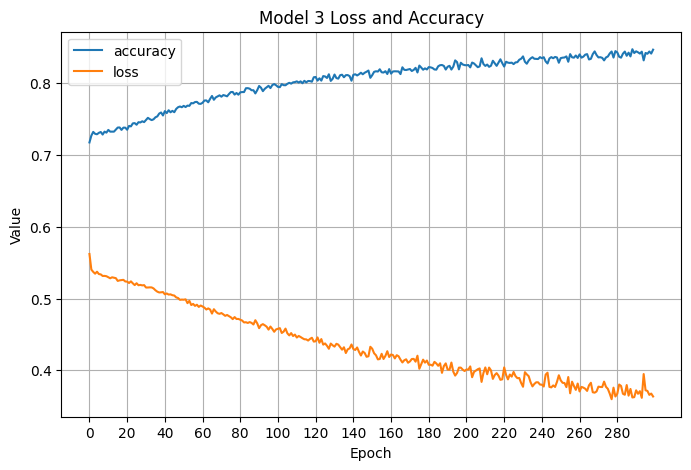

In [17]:
# still can't get back above 71% accuracy!
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model 3 Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(np.arange(0, epochs, 20))
plt.show()

The discrepancies between the neural net accuracy during training and the accuracy when evaluating against the test set clearly indicates overfitting, but this overfitting interestingly enough does not harm accuracy. Also interesting is that training the neural network on 5 principal components, rather than the data set, resulted in a fit that was about 1-2% worse. The neural network probably would have gotten a better fit with one or two additional principal components.

In [18]:
# Go back to original neural network, train on 6 principal components
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

num_principal_components = 6

epochs = 100

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
history_4 = model_4.fit(X_train_pca[:, :num_principal_components+1], y_train, epochs=epochs, verbose=1)
loss, accuracy = model_4.evaluate(X_test_pca[:, :num_principal_components+1], y_test)
print(f"Loss of neural network: {loss:.3f}")
print(f"Accuracy of neural network: {accuracy:.3f}")

Epoch 1/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6325 - loss: 0.6476
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7175 - loss: 0.5520
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7191 - loss: 0.5405
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7313 - loss: 0.5280
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7213 - loss: 0.5365
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7176 - loss: 0.5393
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7286 - loss: 0.5253
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7301 - loss: 0.5291
Epoch 9/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7304 - loss: 0.5297
Epoch 10/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7347 - loss: 0.5274
Epoch 11/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7345 - loss: 0.5259
Epoch 12/100
247/247 ━━━━━━━━━━━━━━━━━━━━

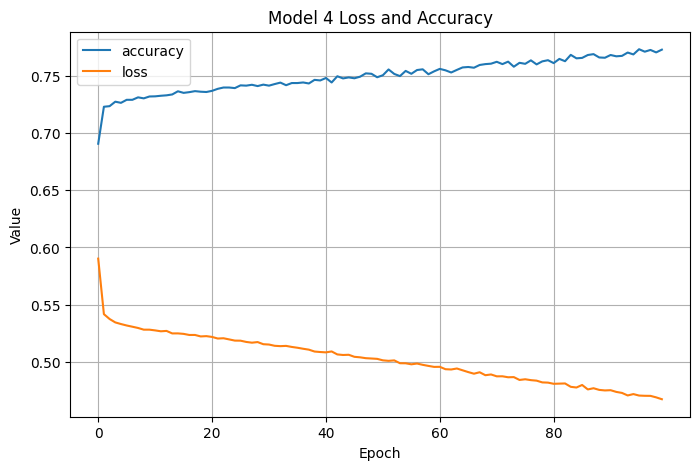

In [19]:
# accuracy went down!
pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model 4 Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(np.arange(0, epochs, 20))
plt.show()

In [20]:
# Go back to original neural network, train on 6 principal components
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

num_principal_components = 7

epochs = 100

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])
history_5 = model_5.fit(X_train_pca[:, :num_principal_components+1], y_train, epochs=epochs, verbose=1)
loss, accuracy = model_5.evaluate(X_test_pca[:, :num_principal_components+1], y_test)
print(f"Loss of neural network: {loss:.3f}")
print(f"Accuracy of neural network: {accuracy:.3f}")

Epoch 1/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6684 - loss: 0.6003
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7208 - loss: 0.5397
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7261 - loss: 0.5447
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7244 - loss: 0.5398
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7259 - loss: 0.5338
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7256 - loss: 0.5384
Epoch 7/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7281 - loss: 0.5276
Epoch 8/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7356 - loss: 0.5249
Epoch 9/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7335 - loss: 0.5266
Epoch 10/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7387 - loss: 0.5254
Epoch 11/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7332 - loss: 0.5269
Epoch 12/100
247/247 ━━━━━━━━━━━━━━━━━━━━

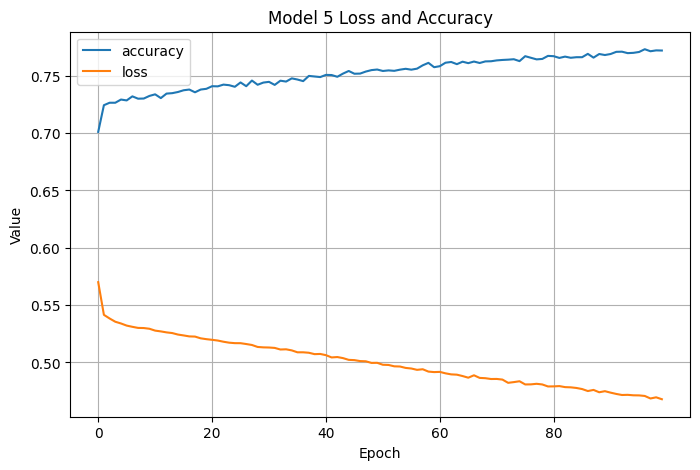

In [21]:
# accuracy is still not as good as the original model
pd.DataFrame(history_5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Model 5 Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.xticks(np.arange(0, epochs, 20))
plt.show()

In [22]:
notebook_end_time = datetime.datetime.now()
print(f"Notebook last run (end-to-end): {notebook_end_time} (duration: {notebook_end_time - notebook_start_time})")

Notebook last run (end-to-end): 2025-02-05 00:25:34.697490 (duration: 0:09:55.767705)
